In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [5]:
X_train.shape , Y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape,Y_test.shape

((10000, 28, 28), (10000,))

In [9]:
def plot_digit(img):
    plt.imshow(img.reshape(28,28),cmap = 'gray')
    plt.show()

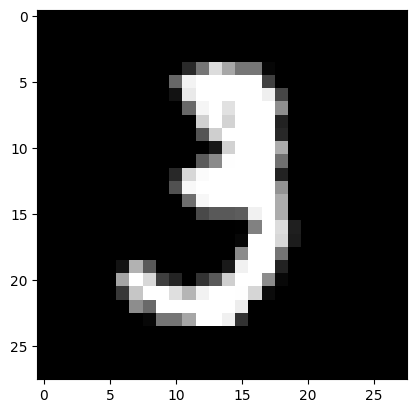

In [10]:
plot_digit(X_train[10])

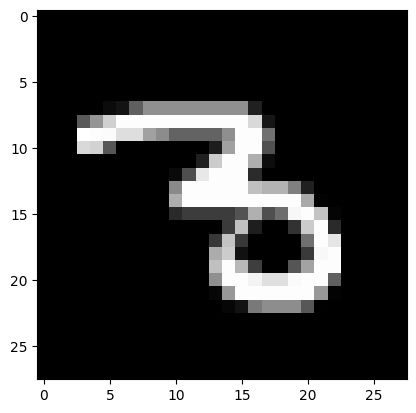

In [11]:
plot_digit(X_train[30])

In [12]:
Y_train[10]

3

In [13]:
Y_train[30]

3

In [14]:
X_train = X_train.reshape((60000,784))

In [15]:
28*28

784

In [16]:
X_train.shape

(60000, 784)

In [17]:
X_test = X_test.reshape((10000,784))

In [18]:
X_test.shape

(10000, 784)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train,Y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
model.score(X_train,Y_train)

0.9339166666666666

In [24]:
model.score(X_test,Y_test)

0.9255

## Neural Networks

In [25]:
from tensorflow.keras import Sequential # we want to create sequential model
from tensorflow.keras.layers import Dense # fully connected layer

In [26]:
model = Sequential()

In [27]:
model.add(Dense(512,activation = 'relu',input_shape = (784,)))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
Y_train_new = to_categorical(Y_train)
Y_train_new.shape

(60000, 10)

In [32]:
model.fit(X_train,Y_train_new,batch_size=128,epochs = 25,validation_split=0.2)

Epoch 1/25
375/375 [==============================] - 14s 31ms/step - loss: 3.3069 - accuracy: 0.8590 - val_loss: 0.4835 - val_accuracy: 0.9096
Epoch 2/25
375/375 [==============================] - 10s 28ms/step - loss: 0.2769 - accuracy: 0.9377 - val_loss: 0.1739 - val_accuracy: 0.9585
Epoch 3/25
375/375 [==============================] - 15s 39ms/step - loss: 0.1888 - accuracy: 0.9558 - val_loss: 0.1726 - val_accuracy: 0.9570
Epoch 4/25
375/375 [==============================] - 11s 30ms/step - loss: 0.1416 - accuracy: 0.9649 - val_loss: 0.2274 - val_accuracy: 0.9646
Epoch 5/25
375/375 [==============================] - 12s 32ms/step - loss: 0.1222 - accuracy: 0.9703 - val_loss: 0.1581 - val_accuracy: 0.9643
Epoch 6/25
375/375 [==============================] - 10s 27ms/step - loss: 0.1045 - accuracy: 0.9754 - val_loss: 0.1866 - val_accuracy: 0.9682
Epoch 7/25
375/375 [==============================] - 14s 39ms/step - loss: 0.0990 - accuracy: 0.9768 - val_loss: 0.2138 - val_accuracy:

In [33]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
Y_test_new = to_categorical(Y_test)
Y_test_new.shape

(10000, 10)

In [35]:
# model.score()
model.evaluate(X_train,Y_train_new)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.1158 - accuracy: 0.9877


[0.11579256504774094, 0.9877166748046875]

In [36]:
model.evaluate(X_test,Y_test_new)

313/313 [==============================] - 2s 5ms/step - loss: 0.3691 - accuracy: 0.9758


[0.3691085875034332, 0.9757999777793884]